In [1]:
# lets start new project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\Electric_Vehicle_Population_Data.csv')

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [6]:
df.shape

(124716, 17)

In [7]:
print('Number of records:',df.shape[0])
print('Number of Columns:',df.shape[1],'\n')

print('Columns:',df.columns)

Number of records: 124716
Number of Columns: 17 

Columns: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [8]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
for column in df.columns:
    print('Number of',column,':',df[column].nunique(),'\n')

Number of VIN (1-10) : 8340 

Number of County : 166 

Number of City : 651 

Number of State : 44 

Number of Postal Code : 781 

Number of Model Year : 21 

Number of Make : 35 

Number of Model : 120 

Number of Electric Vehicle Type : 2 

Number of Clean Alternative Fuel Vehicle (CAFV) Eligibility : 3 

Number of Electric Range : 101 

Number of Base MSRP : 31 

Number of Legislative District : 49 

Number of DOL Vehicle ID : 124716 

Number of Vehicle Location : 768 

Number of Electric Utility : 73 

Number of 2020 Census Tract : 2036 



# Country

In [11]:
 print('Number of Counties:',df[column].nunique())

Number of Counties: 2036


Counties having Most Vechicals

In [12]:
print("Counties having Most Vechicals\n",df['County'].value_counts().nlargest(10))

Counties having Most Vechicals
 County
King         65268
Snohomish    14061
Pierce        9538
Clark         7404
Thurston      4548
Kitsap        4148
Whatcom       3101
Spokane       3080
Benton        1568
Skagit        1406
Name: count, dtype: int64


In [30]:
df_king = df[df['County']=='King']
print('Most used Model in King county:\n',df_king['Model'].value_counts().nlargest())

Most used Model in King county:
 Model
MODEL 3    14128
MODEL Y    12036
LEAF        6371
MODEL S     4086
MODEL X     2845
Name: count, dtype: int64


Finding the null value and replacing it with other

In [14]:
df[['County','Model']].isnull().sum()

County      2
Model     181
dtype: int64

In [20]:
df.Model.fillna('Other',inplace =True)
df.County.fillna('Other',inplace =True)

In [21]:
df[['County','Model']].isnull().any()

County    False
Model     False
dtype: bool

# 1st 10 countries having most model

In [25]:
x = df['County'].head(10)
y = df['Model'].head(10)

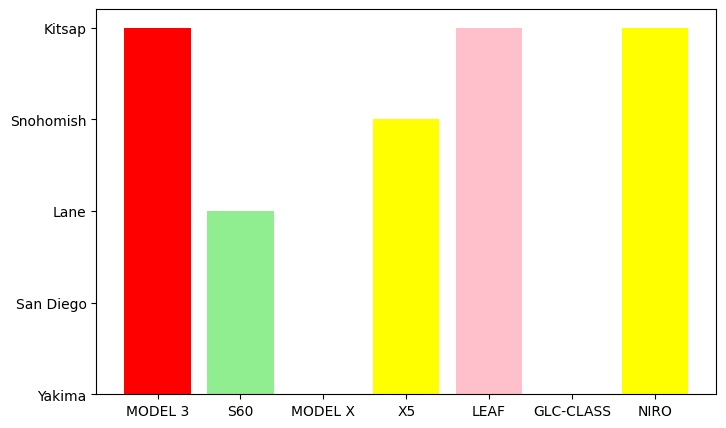

In [29]:
plt.figure(figsize = (8,5))
plt.bar(list(y),list(x),color = ['blue','red','lightgreen','pink','yellow'])
plt.show()

Counties having Least Vechicals

In [49]:
print("Counties having Least Vechicals\n",df['County'].value_counts().nsmallest(10))

Counties having Least Vechicals
 County
Polk           1
Larimer        1
Jackson        1
Sheridan       1
Lee            1
Houston        1
Denton         1
Rock Island    1
Howard         1
Charles        1
Name: count, dtype: int64


In [ ]:
# df.drop(df['County'].value_counts().nsmallest())

# City

In [51]:
print("City having Most Vechicals\n",df['City'].value_counts().nlargest(10))

City having Most Vechicals
 City
Seattle      22009
Bellevue      6489
Redmond       4646
Vancouver     4464
Kirkland      3923
Bothell       3852
Sammamish     3653
Renton        3115
Olympia       3041
Tacoma        2655
Name: count, dtype: int64


In [52]:
df_Seattle = df[df['City']=='Seattle']
print('Most used Model in Seattle City:\n',df_Seattle['Model'].value_counts().nlargest())

Most used Model in Seattle City:
 Model
MODEL 3    4339
MODEL Y    3238
LEAF       2592
MODEL S    1074
BOLT EV    1019
Name: count, dtype: int64


In [53]:
print("City having Least Vechicals\n",df['City'].value_counts().nsmallest(10))

City having Least Vechicals
 City
Deer Harbor         1
Fort Leavenworth    1
Goldsboro           1
Annapolis           1
Prescott            1
Nespelem            1
Hunters             1
Rayville            1
Klickitat           1
Smith Creek         1
Name: count, dtype: int64


# State

In [54]:
print("State having Most Vechicals\n",df['State'].value_counts().nlargest(10))

State having Most Vechicals
 State
WA    124419
CA        80
VA        36
MD        27
TX        18
CO        10
NC         9
AZ         8
GA         7
CT         7
Name: count, dtype: int64


In [55]:
df_State = df[df['State']=='WA']
print('Most used Model in Seattle City:\n',df_State['Model'].value_counts().nlargest())

Most used Model in Seattle City:
 Model
MODEL 3    24329
MODEL Y    20632
LEAF       12910
MODEL S     7330
BOLT EV     4985
Name: count, dtype: int64


In [56]:
print("State having Least Vechicals\n",df['State'].value_counts().nsmallest(10))

State having Least Vechicals
 State
WI    1
NM    1
DE    1
AL    1
AK    1
RI    1
NH    1
MN    1
IN    1
MS    1
Name: count, dtype: int64


# Postal Code

In [59]:
print("Postal Code having Least Vechicals\n",df['Postal Code'].value_counts().nlargest(10))

Postal Code having Least Vechicals
 Postal Code
98052.0    3247
98033.0    2233
98012.0    2161
98004.0    2140
98006.0    2049
98115.0    2016
98072.0    1834
98040.0    1827
98074.0    1792
98034.0    1734
Name: count, dtype: int64


In [61]:
df_postal = df[df['Postal Code']==98052.0]
print('Most used Model in Postal 98052.0:\n',df_postal['Model'].value_counts().nlargest())

Most used Model in Postal 98052.0:
 Model
MODEL 3    842
MODEL Y    768
LEAF       334
MODEL S    189
MODEL X    157
Name: count, dtype: int64


In [62]:
print('Postal Code having Least vehicle:',df['Postal Code'].value_counts().nsmallest())

Postal Code having Least vehicle: Postal Code
92595.0    1
99137.0    1
28376.0    1
90802.0    1
93436.0    1
Name: count, dtype: int64


# Model

In [65]:
print('Total number of Model:\n', df.Model.unique())

Total number of Model:
 ['MODEL 3' 'S60' 'MODEL X' 'X5' 'LEAF' 'GLC-CLASS' 'NIRO' 'SOUL' 'EV6'
 'VOLT' 'MODEL S' 'FOCUS' 'MODEL Y' 'I3' 'BOLT EV' 'C-MAX' 'FUSION' 'XC60'
 'X3' 'HARDTOP' 'PRIUS PRIME' '500' 'RAV4 PRIME' 'EDV' 'SOUL EV'
 'SOLTERRA' 'XC90' 'Q4' 'CAYENNE' 'GRAND CHEROKEE' 'R1T' 'XC40' 'I8'
 'KONA' 'SONATA' 'SPARK' 'PACIFICA' 'I4' 'Q5 E' 'ID.4' 'WRANGLER'
 'PRIUS PLUG-IN' 'E-GOLF' 'CLARITY' 'BOLT EUV' 'FORTWO' 'ESCAPE' '530E'
 'CORSAIR' 'MUSTANG MACH-E' 'KONA ELECTRIC' 'OUTLANDER' 'EQ FORTWO'
 'E-TRON' 'GLE-CLASS' 'SORENTO' 'RAV4' 'A3' 'CT6' 'E-TRON SPORTBACK'
 'IONIQ 5' 'PS2' 'R1S' 'EQS-CLASS SUV' 'C40' '330E' 'TAYCAN' 'I-PACE'
 'E-TRON GT' 'F-150' 'LUCID AIR' 'SPORTAGE' 'COUNTRYMAN' 'IX' 'TUCSON'
 'Other' 'IONIQ' 'Q5' 'EQS-CLASS SEDAN' 'TRANSIT' 'B-CLASS' 'AVIATOR'
 'OPTIMA' 'A8 E' 'EQB-CLASS' 'SANTA FE' 'PANAMERA' 'ROADSTER' 'NX'
 'FORTWO ELECTRIC DRIVE' 'C-CLASS' 'BZ4X' 'CROSSTREK' 'I-MIEV'
 'RANGE ROVER SPORT' 'ELR' 'LYRIQ' 'V60' 'RANGER' 'ARIYA' 'GV60' 'KARMA'
 'S90' 

In [66]:
print('Total number of Model:\n', df.Model.nunique())

Total number of Model:
 121


# Model Year

In [68]:
print('Total number of Model year:\n',df['Model Year'].nunique())

Total number of Model year:
 21


In [69]:
print("Model Year",df['Model Year'].value_counts())

Model Year Model Year
2022    27522
2021    18296
2018    14224
2023    13353
2020    10926
2019    10450
2017     8558
2016     5702
2015     4935
2013     4581
2014     3609
2012     1668
2011      828
2010       24
2008       22
2000        9
1999        4
2002        2
1998        1
2003        1
1997        1
Name: count, dtype: int64


<Axes: xlabel='Model Year'>

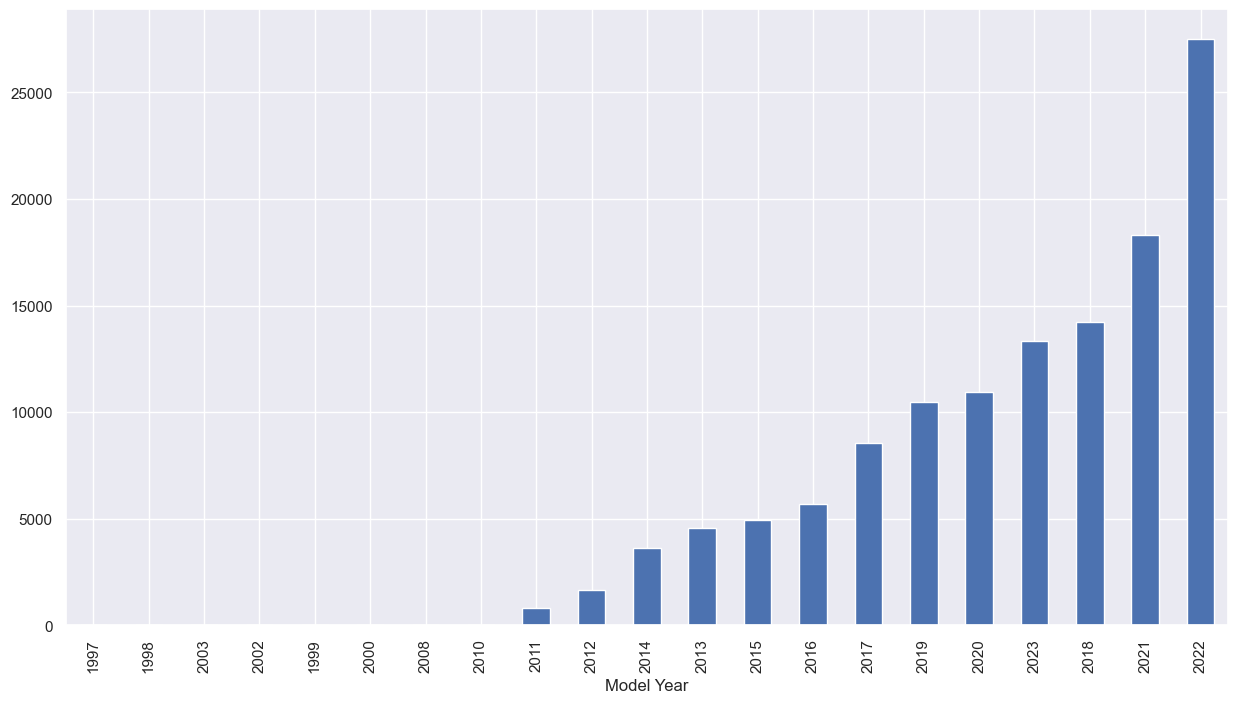

In [72]:
plt.figure(figsize = (15,8))
df['Model Year'].value_counts().sort_values().plot(kind="bar")